### Load Datasets

In [46]:
%load_ext autoreload
%autoreload 2

import numpy as np
from NN import NN
from util import compute_clean_data
import matplotlib.pyplot as plt 

# init datasets
full_train_X, full_train_Y = compute_clean_data("data/mnist_train.csv")
full_test_X, full_test_Y = compute_clean_data("data/mnist_test.csv")

mini_train_X, mini_train_Y = compute_clean_data("data/mnist_train_100.csv")
mini_test_X, mini_test_Y = compute_clean_data("data/mnist_test_10.csv")

half_train_X, half_train_Y = full_train_X[30000:], full_train_Y[30000:]
half_test_X, half_test_Y = full_test_X[5000:], full_test_Y[5000:]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Define Train Function using Stochastic Gradient Descent

In [100]:
from util import randomize_order

def train(nn, epochs, lr, train_X, train_Y, valid_X, valid_Y, show_loss=True):
    # Set datasets
    nn.setAlpha(lr)
    nn.setTrainData(train_X, train_Y)
    nn.setTestData(valid_X, valid_Y)

    # Stochastic Gradient Descent 
    losses = []

    for _ in range(epochs):    
        # Randomize order of training data for this epoch
        X, Y  = randomize_order(nn.train_X, nn.train_Y)
        nn.setTrainData(train_X=X, train_Y=Y)

        # Train 
        avg_loss = nn.train(show_loss)
        losses.append(avg_loss)
    return losses

def plot_loss_over_epoch(losses, epochs):
    plt.title('Loss over epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(list(range(1, epochs + 1)), losses)
    plt.show()

### Find Optimal Learning Rate using K-Fold Cross Validation

In [102]:
# Initialize parameters 
test_X, test_Y = full_test_X, full_test_Y
X, Y = full_train_X, full_train_Y
batch_size = 10000
N = X.shape[0]
epochs = 5
show_loss = False 

# Initialize Neural Network 
nn = NN(
    numNeurons=[784, 200, 100, 10],
    alpha=0.001,
    train_X=full_train_X,
    train_Y=full_train_Y,
)

alphas = [0.001, 0.005, 0.0075, 0.008, 0.01, 0.025]
losses = []
accs = []
for i, alpha in enumerate(alphas):
    nn.setAlpha(alpha)

    # Validation data
    valid_X = X.take(range(i, i + batch_size), axis=0, mode='wrap')
    valid_Y = Y.take(range(i, i + batch_size), axis=0, mode='wrap')

    # Train data 
    train_X = X.take(range(i + batch_size, i + N), axis=0, mode='wrap')
    train_Y = Y.take(range(i + batch_size, i + N), axis=0, mode='wrap')

    # Train network using current learning rate
    cur_losses = train(nn, epochs, alpha, train_X, train_Y, valid_X, valid_Y, show_loss)    
    avg_loss = sum(cur_losses) / epochs
    losses.append(avg_loss)

    # Test Network using newly learned weights 
    acc = nn.test()
    accs.append(acc)
    
    # Randomize weights between folds 
    nn.randomizeWeights()

Accuracy = 0.9108
Accuracy = 0.9351
Accuracy = 0.9487
Accuracy = 0.9408
Accuracy = 0.9469
Accuracy = 0.8374


### Visualize sata  

Optimal learning rate is 0.0075
An lr of 0.001 yielded 4.6191554790083496 loss and 91.08000000000001% accuracy.
An lr of 0.005 yielded 4.721635150320417 loss and 93.51% accuracy.
An lr of 0.0075 yielded 4.858628357828679 loss and 94.87% accuracy.
An lr of 0.008 yielded 4.896072492613568 loss and 94.08% accuracy.
An lr of 0.01 yielded 4.850562354860462 loss and 94.69% accuracy.
An lr of 0.025 yielded 5.334482274639939 loss and 83.74000000000001% accuracy.


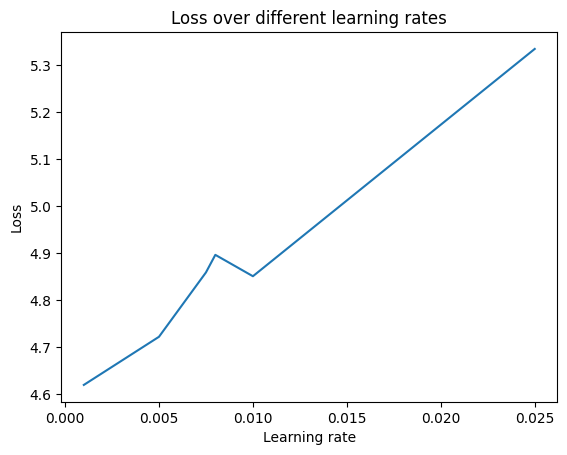

In [103]:
# Determine best learning rate 
opt_lr = alphas[accs.index(max(accs))]
print(f"Optimal learning rate is {opt_lr}")

for i in range(len(alphas)):
    print(f"An lr of {alphas[i]} yielded {losses[i]} loss and {accs[i] * 100}% accuracy.")

# Visualize loss over learning rate
plt.title('Loss over different learning rates')
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.plot(alphas, losses)
plt.show()

### Train and test todel using optimal learning rate

Loss on iteration 10000 = 4.107067194401984
Loss on iteration 20000 = 5.105434880503086
Loss on iteration 30000 = 4.707999905468681
Loss on iteration 40000 = 5.931872864102646
Loss on iteration 50000 = 5.470347614391453
Loss on iteration 60000 = 5.532090879699101
Loss on iteration 10000 = 4.386179986539403
Loss on iteration 20000 = 3.445323107433115
Loss on iteration 30000 = 4.018358502725334
Loss on iteration 40000 = 4.052620385122032
Loss on iteration 50000 = 5.538295495198417
Loss on iteration 60000 = 3.167904352276196
Loss on iteration 10000 = 5.580977206355013
Loss on iteration 20000 = 5.458013747086074
Loss on iteration 30000 = 5.255068465095304
Loss on iteration 40000 = 4.557260342003944
Loss on iteration 50000 = 4.554163442169192
Loss on iteration 60000 = 5.982542247570149
Loss on iteration 10000 = 6.881971467501953
Loss on iteration 20000 = 3.9254148127631385
Loss on iteration 30000 = 6.988027156658808
Loss on iteration 40000 = 5.843562838510733
Loss on iteration 50000 = 3.185

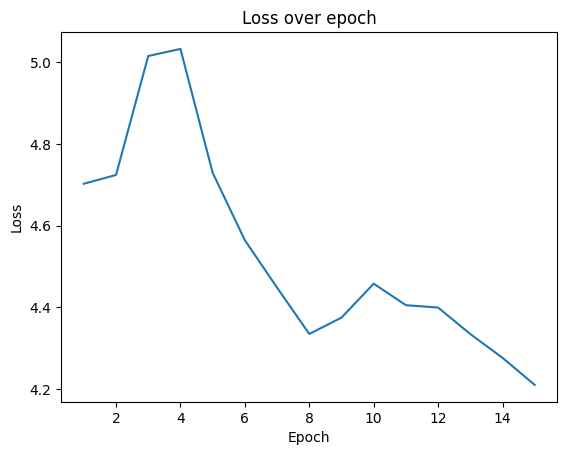

Accuracy = 0.9605


In [105]:
# Initialize Neural Network 
nn = NN(
    numNeurons=[784, 200, 100, 10],
    alpha=opt_lr,
    train_X=full_train_X,
    train_Y=full_train_Y,
    test_X=full_test_X,
    test_Y=full_test_Y
)
epochs = 15

# Train network using optimal learning rate 
losses = train(
        nn=nn, 
        epochs=epochs, 
        lr=opt_lr, 
        train_X=full_train_X, 
        train_Y=full_train_Y, 
        valid_X=full_test_X, 
        valid_Y=full_test_Y
    )

# Visualize loss during training
plot_loss_over_epoch(losses, epochs)

# Determine accuracy of the network 
acc = nn.test()
